In [ ]:
from IPython.display import clear_output

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/nti/rucos

/content/drive/MyDrive/nti/rucos


In [ ]:
#@title args

def get_argument_parser():
    parser = argparse.ArgumentParser()

    # Required parameters
  
    parser.add_argument(
        "--max_seq_length",
        default=512,
        type=int,
        help=
        "The maximum total input sequence length after WordPiece tokenization. Sequences "
        "longer than this will be truncated, and sequences shorter than this will be padded."
    )
    parser.add_argument(
        "--doc_stride",
        default=128,
        type=int,
        help=
        "When splitting up a long document into chunks, how much stride to take between chunks."
    )
    parser.add_argument(
        "--max_query_length",
        default=64,
        type=int,
        help=
        "The maximum number of tokens for the question. Questions longer than this will "
        "be truncated to this length.")
    parser.add_argument("--do_train",
                        default=True,
                        action='store_true',
                        help="Whether to run training.")
    parser.add_argument("--do_predict",
                        default=True,
                        action='store_true',
                        help="Whether to run eval on the dev set.")
    parser.add_argument("--train_batch_size",
                        default=24,
                        type=int,
                        help="Total batch size for training.")
    parser.add_argument("--predict_batch_size",
                        default=8,
                        type=int,
                        help="Total batch size for predictions.")
    parser.add_argument("--learning_rate",
                        default=5e-5,
                        type=float,
                        help="The initial learning rate for Adam.")
    parser.add_argument("--num_train_epochs",
                        default=1,
                        type=float,
                        help="Total number of training epochs to perform.")
    parser.add_argument(
        "--warmup_proportion",
        default=0.1,
        type=float,
        help=
        "Proportion of training to perform linear learning rate warmup for. E.g., 0.1 = 10% "
        "of training.")
    parser.add_argument(
        "--n_best_size",
        default=20,
        type=int,
        help=
        "The total number of n-best predictions to generate in the nbest_predictions.json "
        "output file.")
    parser.add_argument(
        "--max_answer_length",
        default=30,
        type=int,
        help=
        "The maximum length of an answer that can be generated. This is needed because the start "
        "and end predictions are not conditioned on one another.")
    parser.add_argument(
        "--verbose_logging",
        action='store_true',
        help=
        "If true, all of the warnings related to data processing will be printed. "
        "A number of warnings are expected for a normal SQuAD evaluation.")
    parser.add_argument('--seed',
                        type=int,
                        default=42,
                        help="random seed for initialization")
    parser.add_argument(
        '--gradient_accumulation_steps',
        type=int,
        default=10,
        help=
        "Number of updates steps to accumulate before performing a backward/update pass."
    )
    parser.add_argument("--local_rank",
                        type=int,
                        default=-1,
                        help="local_rank for distributed training on gpus")
    parser.add_argument(
        '--wall_clock_breakdown',
        action='store_true',
        default=True,
        help=
        "Whether to display the breakdown of the wall-clock time for foraward, backward and step"
    )


    parser.add_argument("--max_grad_norm",
                        default=1.,
                        type=float,
                        help="Gradient clipping for FusedAdam.")
    parser.add_argument('--job_name',
                        type=str,
                        default='/',
                        help='Output path for Tensorboard event files.')

    parser.add_argument(
        '--preln',
        action='store_true',
        default=False,
        help=
        "Whether to display the breakdown of the wall-clock time for foraward, backward and step"
    )

    parser.add_argument(
        '--loss_plot_alpha',
        type=float,
        default=0.2,
        help='Alpha factor for plotting moving average of loss.')

    parser.add_argument(
        '--max_steps',
        type=int,
        default=sys.maxsize,
        help=
        'Maximum number of training steps of effective batch size to complete.'
    )

    parser.add_argument(
        '--max_steps_per_epoch',
        type=int,
        default=sys.maxsize,
        help=
        'Maximum number of training steps of effective batch size within an epoch to complete.'
    )

    parser.add_argument('--print_steps',
                        type=int,
                        default=2000,
                        help='Interval to print training details.')

    parser.add_argument('--deepspeed_transformer_kernel',
                        default=False,
                        action='store_true',
                        help='Use DeepSpeed transformer kernel to accelerate.')

    parser.add_argument('--dropout', type=float, default=0.1, help='dropout')

    parser.add_argument(
        '--ckpt_type',
        type=str,
        default="HF",
        help="Checkpoint's type, DS - DeepSpeed, TF - Tensorflow, HF - Huggingface.")

    parser.add_argument(
        "--origin_bert_config_file",
        type=str,
        default=None,
        help="The config json file corresponding to the non-DeepSpeed pre-trained BERT model."
    )
    parser.add_argument(
        '--deepspeed_config',
        default='conf_deep.json'
    )
    parser.add_argument(
        '--deepspeed',
        type=bool,
        default=True
    )
    return parser

In [ ]:
try:
  import sentencepiece
except ImportError:
  !pip install sentencepiece
  clear_output

     |████████████████████████████████| 1.2MB 8.4MB/s 


In [ ]:
!pip install transformers
clear_output()

In [ ]:
!ls

'bbbbbert (1).ipynb'
 bert_qa
 bert-qa
 conf_deep.json
 Miniconda3-latest-Linux-x86_64.sh
 out.jsonl
 pytorch-xla-env-setup.py
 qas-roberta
 roberta-qas
 sbersquad_train.json
 sentence_multi_cased.txt
 t5.t7
 test.jsonl
 torch-1.6-cp37-cp37m-linux_x86_64.whl
 torch-nightly+20200515-cp37-cp37m-linux_x86_64.whl
 torch-nightly-cp37-cp37m-linux_x86_64.whl
 torchvision-1.6-cp37-cp37m-linux_x86_64.whl
 torchvision-nightly+20200515-cp37-cp37m-linux_x86_64.whl
 torchvision-nightly-cp37-cp37m-linux_x86_64.whl
 torch_xla-1.6-cp37-cp37m-linux_x86_64.whl
 torch_xla-nightly+20200515-cp37-cp37m-linux_x86_64.whl
 torch_xla-nightly-cp37-cp37m-linux_x86_64.whl
 train.jsonl
 val.jsonl


In [ ]:
#@title imports
import torch
from torch.utils.data import TensorDataset, DataLoader, SequentialSampler
from sklearn.model_selection import train_test_split
from transformers import AutoModelForQuestionAnswering,AutoModel, AutoConfig, get_cosine_schedule_with_warmup, AdamW, Trainer, TrainingArguments
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
from sklearn.metrics import accuracy_score
import json
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.ERROR)

In [ ]:
PATH = "DeepPavlov/rubert-base-cased"

In [ ]:
EPOCHS = 1

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if device == torch.device('cpu'):
    print('Using cpu')
else:
    n_gpu = torch.cuda.device_count()
    print('Using {} GPUs'.format(torch.cuda.get_device_name(0)))

Using cpu


In [ ]:
model = AutoModelForQuestionAnswering.from_pretrained(PATH)

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.to(device)
if True:
  clear_output()

In [ ]:
with open('train.jsonl', 'r', encoding='utf-8') as data:
  dat = list(data)
with open('val.jsonl', 'r', encoding='utf-8') as data:
  val = list(data)
dat = dat + val

FileNotFoundError: ignored

In [ ]:
labels = []
train_text = []
train_query = []
length = []
answers = []
for example in dat[:10000] + val:
  ex = json.loads(example)
  text = ex['passage']['text']
  query = ex['qas'][0]['query']
  # length.append(len(tokenizer.tokenize(text)))
  # answers = list(set(list(map(lambda x:text[x['start']:x['end']], ex['passage']['entities']))))
  for ans in ex['qas'][0]['answers']:
     answers.append([ans['start'], ans['end']])
     train_text.append(text)
     train_query.append(query + ' ' + ans['text'])

In [ ]:

# val_answers = []
# valid_text = []
# valid_queries = []
# length = []
# for example in dat[]:
#   ex = json.loads(example)
#   text = ex['passage']['text']
#   query = ex['qas'][0]['query']
#   # length.append(len(tokenizer.tokenize(text)))
#   for ans in ex['qas'][0]['answers']:
#      val_answers.append([ans['start'], ans['end']])
#      valid_text.append(text)
#      valid_queries.append(query + ' ' + ans['text'])

In [ ]:
import transformers
from transformers import BertTokenizerFast
tokenizer =BertTokenizerFast.from_pretrained(PATH)
assert isinstance(tokenizer, transformers.PreTrainedTokenizerFast)
tokenizer.padding_side = "right"
pad_on_right = True

In [ ]:
def prepare_train_features(questions, texts, labels):
    # Tokenize our examples with truncation and padding, but keep the overflows using a stride. This results
    # in one example possible giving several features when a context is long, each of those features having a
    # context that overlaps a bit the context of the previous feature.
  tokenized_examples = tokenizer(questions, texts, 
                              max_length=512,
                              padding='max_length',
                              stride=128,
                              truncation='only_second',
                              return_overflowing_tokens=True,
                              return_offsets_mapping=True)


  sample_mapping = tokenized_examples.pop("overflow_to_sample_mapping")

  offset_mapping = tokenized_examples.pop("offset_mapping")

  tokenized_examples["start_positions"] = []
  tokenized_examples["end_positions"] = []

  for i, offsets in enumerate(offset_mapping):
      # We will label impossible answers with the index of the CLS token.
      input_ids = tokenized_examples["input_ids"][i]
      cls_index = input_ids.index(tokenizer.cls_token_id)

      # Grab the sequence corresponding to that example (to know what is the context and what is the question).
      sequence_ids = tokenized_examples.sequence_ids(i)

      # One example can give several spans, this is the index of the example containing this span of text.
      sample_index = sample_mapping[i]
      answers = labels[sample_index]
      # If no answers are given, set the cls_index as answer.
      if len(answers) == 0:
          tokenized_examples["start_positions"].append(cls_index)
          tokenized_examples["end_positions"].append(cls_index)
      else:
          # Start/end character index of the answer in the text.
          start_char = answers[0]
          end_char = answers[1]

          # Start token index of the current span in the text.
          token_start_index = 0
          while sequence_ids[token_start_index] != (1 if pad_on_right else 0):
              token_start_index += 1

          # End token index of the current span in the text.
          token_end_index = len(input_ids) - 1
          while sequence_ids[token_end_index] != (1 if pad_on_right else 0):
              token_end_index -= 1

          # Detect if the answer is out of the span (in which case this feature is labeled with the CLS index).
          if not (offsets[token_start_index][0] <= start_char and offsets[token_end_index][1] >= end_char):
              tokenized_examples["start_positions"].append(cls_index)
              tokenized_examples["end_positions"].append(cls_index)
          else:
              # Otherwise move the token_start_index and token_end_index to the two ends of the answer.
              # Note: we could go after the last offset if the answer is the last word (edge case).
              while token_start_index < len(offsets) and offsets[token_start_index][0] <= start_char:
                  token_start_index += 1
              tokenized_examples["start_positions"].append(token_start_index - 1)
              while offsets[token_end_index][1] >= end_char:
                  token_end_index -= 1
              tokenized_examples["end_positions"].append(token_end_index + 1)

  return tokenized_examples

In [ ]:
train_data = prepare_train_features(texts=train_text,questions=train_query, labels=answers)
# validation_data = prepare_train_features(texts=valid_text,questions=valid_queries, labels=val_answers)
del train_text, train_query
print('train data: {}'.format(len(train_data['input_ids'])))

train data: 51594


In [ ]:
train_inputs = torch.tensor(train_data['input_ids'], dtype=torch.long)
train_mask = torch.tensor(train_data['attention_mask'], dtype=torch.long)
start_score = torch.tensor(train_data['start_positions'], dtype=torch.long)
end_score = torch.tensor(train_data['end_positions'], dtype=torch.long)

training_data = TensorDataset(train_inputs, train_mask, start_score, end_score)
del train_data
train_dataloader = DataLoader(
    training_data,
    sampler=SequentialSampler(training_data),
    batch_size=8)

In [ ]:
# args = TrainingArguments(
#     f"test-squad",
#     evaluation_strategy = "epoch",
#     learning_rate=2e-5,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     num_train_epochs=3,
#     weight_decay=0.01,
# )

In [ ]:
model = AutoModelForQuestionAnswering.from_pretrained(PATH)

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.config.hidden_dropout_prob = 0.2
model.config.attention_probs_dropout_prob = 0.3
model.aux_logits = False

In [ ]:
steps_per_epoch = len(train_dataloader)
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_cosine_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=steps_per_epoch, 
                                            num_training_steps=steps_per_epoch * 2)

In [ ]:
model.to(device)

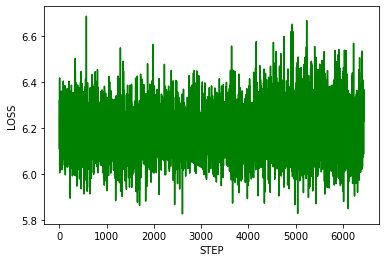


Step: [6440 / 3225], Loss: 6.091729164123535, Time:  13:50:44


100%|██████████| 1/1 [50:58<00:00, 3058.76s/it]


In [ ]:
from IPython.display import clear_output
from tqdm import trange
import time
torch.cuda.empty_cache()
start_logits, end_logits = [], []
train_loss_set = []
train_loss = 0
# Обучение

for epoch in trange(EPOCHS):

  for step, batch in enumerate(train_dataloader):
    model.train()
    batch = tuple(t.to(device) for t in batch)
    input_ids, mask, start, end = batch
    #forward() method
    preds = model(input_ids,attention_mask=mask,start_positions=start, end_positions=end)
    loss = preds[0]
    #runs backpropagation
    loss.backward()
    train_loss_set.append(loss)
    optimizer.zero_grad()
    optimizer.step()
    scheduler.step()
    #weight update
    if step % 10 == 0:
        clear_output()
        plt.plot(train_loss_set, 'g')
        plt.xlabel('STEP')
        plt.ylabel('LOSS')
        plt.show()

    if not step%10:
        print()
        print(f"Step: [{step} / {len(train_dataloader) // 2}], Loss: {loss.item()}, Time: {time.asctime()[10:-5]}")
    if step % 1000 == 0:
      model.save_pretrained('bert_qa')
        # model.eval()


        # for batch in tqdm(validation_dataloader):   
        #     # добавляем батч для вычисления на GPU
        #     batch = tuple(t.to(device) for t in batch)
            
        #     # Распаковываем данные из dataloader
        #     b_input_ids,valid_start, valid_end, b_input_mask = batch
        #     start = torch.tensor([[i[0]] for i in labels], device=device).long()
        #     end = torch.tensor([[i[1]] for i in labels], device=device).long()
        #     # При использовании .no_grad() модель не будет считать и хранить градиенты.
        #     # Это ускорит процесс предсказания меток для валидационных данных.
        #     with torch.no_grad():
        #         preds = model(b_input_ids, attention_mask=b_input_mask)
        #     # Перемещаем logits и метки классов на CPU для дальнейшей работы
        #     # preds = [key.detach().cpu().numpy() for key in preds[1:]]
        #     start = preds['start_logits'].to('cpu').numpy()
        #     end = preds['end_logits'].to('cpu').numpy()
        #     start_logits.append(start)
        #     end_logits.append(end)
  # print("Loss на обучающей выборке: {0:.5f}".format(train_loss / len(train_dataloader)))


In [ ]:
torch.save(model.state_dict(), 'bert-qa')

In [ ]:
with open('test.jsonl', 'r', encoding='utf-8') as data:
  dat = list(data)
val_ids = []
val_answers = []
valid_text = []
valid_queries = []
length = []
for example in dat:
  ex = json.loads(example)
  text = ex['passage']['text']
  val_ids.append(ex['idx'])
  query = ex['qas'][0]['query']
  # length.append(len(tokenizer.tokenize(text)))
  # for ans in ex['text']['entities']:
    #  val_answers.append([ans['start'], ans['end']])
  valid_text.append(text)
  valid_queries.append(query)

In [ ]:
def prepare_(questions, texts, ids):
    # Tokenize our examples with truncation and maybe padding, but keep the overflows using a stride. This results
    # in one example possible giving several features when a context is long, each of those features having a
    # context that overlaps a bit the context of the previous feature.
    tokenized_examples = tokenizer(
        questions,
        texts,
        truncation="only_second" ,
        max_length=512,
        stride=128,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    # Since one example might give us several features if it has a long context, we need a map from a feature to
    # its corresponding example. This key gives us just that.
    sample_mapping = tokenized_examples.pop("overflow_to_sample_mapping")

    # We keep the example_id that gave us this feature and we will store the offset mappings.
    tokenized_examples["example_id"] = []

    for i in range(len(tokenized_examples["input_ids"])):
        # Grab the sequence corresponding to that example (to know what is the context and what is the question).
        sequence_ids = tokenized_examples.sequence_ids(i)
        context_index = 1 if pad_on_right else 0

        # One example can give several spans, this is the index of the example containing this span of text.
        sample_index = sample_mapping[i]
        tokenized_examples["example_id"].append(examples["id"][sample_index])

        # Set to None the offset_mapping that are not part of the context so it's easy to determine if a token
        # position is part of the context or not.
        tokenized_examples["offset_mapping"][i] = [
            (o if sequence_ids[k] == context_index else None)
            for k, o in enumerate(tokenized_examples["offset_mapping"][i])
        ]

    return tokenized_examples

In [ ]:
validation_features = prepare(valid_queries, valid_text, val_ids)

NameError: ignored

In [ ]:
validation_inputs = torch.tensor(validation_data['input_ids'], dtype=torch.long)
# validation_start = torch.tensor(validation_data['start_positions'], dtype=torch.long)
# validation_end = torch.tensor(validation_data['end_positions'], dtype=torch.long)
validation_mask = torch.tensor(validation_data['attention_mask'], dtype=torch.long)

valid_data = TensorDataset(validation_inputs,validation_mask)
validation_dataloader = val_sampler = SequentialSampler(valid_data)
validation_dataloader = DataLoader(
    valid_data,
    sampler=val_sampler,
    batch_size=4)

In [ ]:
model.eval()
start_logits, end_logits = [], []
for batch in tqdm(validation_dataloader):   
    # добавляем батч для вычисления на GPU
    batch = tuple(t.to(device) for t in batch)
    
    # Распаковываем данные из dataloader
    b_input_ids,valid_start, valid_end, b_input_mask = batch
    start = torch.tensor([[i[0]] for i in labels], device=device).long()
    end = torch.tensor([[i[1]] for i in labels], device=device).long()
    # При использовании .no_grad() модель не будет считать и хранить градиенты.
    # Это ускорит процесс предсказания меток для валидационных данных.
    with torch.no_grad():
        preds = model(b_input_ids, attention_mask=b_input_mask)
    # Перемещаем logits и метки классов на CPU для дальнейшей работы
    # preds = [key.detach().cpu().numpy() for key in preds[1:]]
    start = preds['start_logits'].to('cpu').numpy()
    end = preds['end_logits'].to('cpu').numpy()
    start_logits.append(start)
    end_logits.append(end)


In [ ]:
from tqdm.auto import tqdm

def postprocess_qa_predictions(examples, features, raw_predictions, n_best_size = 20, max_answer_length = 30):
    all_start_logits, all_end_logits = start_logits, end_logits
    # Build a map example to its corresponding features.
    example_id_to_index = {k: i for i, k in enumerate(examples["id"])}
    features_per_example = collections.defaultdict(list)
    for i, feature in enumerate(features):
        features_per_example[example_id_to_index[feature["example_id"]]].append(i)

    # The dictionaries we have to fill.
    predictions = collections.OrderedDict()

    # Logging.
    print(f"Post-processing {len(examples)} example predictions split into {len(features)} features.")

    # Let's loop over all the examples!
    for example_index, example in enumerate(tqdm(examples)):
        # Those are the indices of the features associated to the current example.
        feature_indices = features_per_example[example_index]

        min_null_score = None # Only used if squad_v2 is True.
        valid_answers = []
        
        context = example["context"]
        # Looping through all the features associated to the current example.
        for feature_index in feature_indices:
            # We grab the predictions of the model for this feature.
            start_logits = all_start_logits[feature_index]
            end_logits = all_end_logits[feature_index]
            # This is what will allow us to map some the positions in our logits to span of texts in the original
            # context.
            offset_mapping = features[feature_index]["offset_mapping"]

            # Update minimum null prediction.
            cls_index = features[feature_index]["input_ids"].index(tokenizer.cls_token_id)
            feature_null_score = start_logits[cls_index] + end_logits[cls_index]
            if min_null_score is None or min_null_score < feature_null_score:
                min_null_score = feature_null_score

            # Go through all possibilities for the `n_best_size` greater start and end logits.
            start_indexes = np.argsort(start_logits)[-1 : -n_best_size - 1 : -1].tolist()
            end_indexes = np.argsort(end_logits)[-1 : -n_best_size - 1 : -1].tolist()
            for start_index in start_indexes:
                for end_index in end_indexes:
                    # Don't consider out-of-scope answers, either because the indices are out of bounds or correspond
                    # to part of the input_ids that are not in the context.
                    if (
                        start_index >= len(offset_mapping)
                        or end_index >= len(offset_mapping)
                        or offset_mapping[start_index] is None
                        or offset_mapping[end_index] is None
                    ):
                        continue
                    # Don't consider answers with a length that is either < 0 or > max_answer_length.
                    if end_index < start_index or end_index - start_index + 1 > max_answer_length:
                        continue

                    start_char = offset_mapping[start_index][0]
                    end_char = offset_mapping[end_index][1]
                    valid_answers.append(
                        {
                            "score": start_logits[start_index] + end_logits[end_index],
                            "text": context[start_char: end_char]
                        }
                    )
        
        if len(valid_answers) > 0:
            best_answer = sorted(valid_answers, key=lambda x: x["score"], reverse=True)[0]
        else:
            # In the very rare edge case we have not a single non-null prediction, we create a fake prediction to avoid
            # failure.
            best_answer = {"text": "", "score": 0.0}
        
        # Let's pick our final answer: the best one or the null answer (only for squad_v2)
        if not squad_v2:
            predictions[example["id"]] = best_answer["text"]
        else:
            answer = best_answer["text"] if best_answer["score"] > min_null_score else ""
            predictions[example["id"]] = answer

    return predictions